# Master Document - Uber Challenge Team 3

## Statement of Purpose
The purpose of this document is to take the inital data frame created by the "starter notebook" and to add additional features that the members of our team have engineered to increase the predictive accuracy of our model. 

### Step 1: Starter Notebook

The first chunk of code is just formatting code borrowed from the starter notebook to set up our data frame in the correct format for submission - nothing else. 

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#We'll generate this later, so don't download it if you're in a hurry
sample_sub = pd.read_csv('SampleSubmission.csv');sample_sub.head()

# Make sure train is in the folder where this notebook is running
data = pd.read_csv('train.csv', 
                   parse_dates = ['Occurrence Local Date Time'])
data = data.drop("Status", axis=1)
data["longitude"] = pd.to_numeric(data.longitude, errors='coerce')

# Train on 2017
train = data.loc[data['Occurrence Local Date Time'] < '2018-01-01']
train = train.loc[data['Occurrence Local Date Time'] >= '2017-01-01']

# Test locally on the last part of 2018
local_test = data.loc[data['Occurrence Local Date Time'] < '2019-01-01']
local_test = local_test.loc[local_test['Occurrence Local Date Time'] >= '2018-09-01']

# Create a dataframe with a column for each segment_id (sid)
# Each row represents an hour.
sids = data['road_segment_id'].unique()

dts = pd.date_range('2017-01-01',
                    '2018-01-01',
                    freq="1h")
tr = pd.DataFrame({'datetime':dts})

for sid in sids:
    tr[str(sid)] = 0
    events = train.loc[train['road_segment_id'] == sid]
    dts = events['Occurrence Local Date Time'].dt.round('H')
    dates = dts.astype(str).unique()
    tr.loc[tr['datetime'].isin(dates), sid] = 1


# Reshape this as in sample submission
# I add some extra columns that may be useful
train = pd.DataFrame({
    'datetime x segment_id':np.concatenate([[str(x) + " x " + str(c) 
                                             for c in sids] 
                                            for x in tr['datetime']]),
    'datetime':np.concatenate([[str(x) for c in sids] for x in tr['datetime']]),
    'segment_id':np.concatenate([[str(c) for c in sids] for x in tr['datetime']]),
    'y':tr[sids].values.flatten()
})

# Same for local test (test from now on)
dts = pd.date_range('2018-09-01','2018-12-31',
                    freq="1h")
tr = pd.DataFrame({'datetime':dts})

for sid in sids:
    print(str(sid))
    tr[str(sid)] = 0
    events = local_test.loc[local_test['road_segment_id'] == sid]
    dts = events['Occurrence Local Date Time'].dt.round('H')
    dates = dts.astype(str).unique()
    tr.loc[tr['datetime'].isin(dates), sid] = 1
    
test = pd.DataFrame({
    'datetime x segment_id':np.concatenate([[str(x) + " x " + str(c) 
                                             for c in sids] 
                                            for x in tr['datetime']]),
    'datetime':np.concatenate([[str(x) for c in sids] for x in tr['datetime']]),
    'segment_id':np.concatenate([[str(c) for c in sids] for x in tr['datetime']]),
    'y':tr[sids].values.flatten()
})

train['datetime'] = pd.to_datetime(train['datetime'])
train['day'] = train['datetime'].dt.day_name()
train['min'] = train['datetime'].dt.hour*60+train['datetime'].dt.minute
locations = data.groupby('road_segment_id').mean()[['longitude', 'latitude']]
locations.head(2)
train = pd.merge(train, locations, left_on='segment_id', right_on='road_segment_id')
test['datetime'] = pd.to_datetime(test['datetime'])
test['day'] = train['datetime'].dt.day_name()
test['min'] = train['datetime'].dt.hour*60+train['datetime'].dt.minute
locations = data.groupby('road_segment_id').mean()[['longitude', 'latitude']]
locations.head(2)
test = pd.merge(test, locations, left_on='segment_id', right_on='road_segment_id')

S0B3CGQ
RYJYAPI
U3KP57C
RY0TRQ8
8LOVJZ3
X4UA382
0QR8FDW
DZABHQW
EKZN1VM
H9XYX9Q
03RHJ3G
FTX7LB8
Q03FQ74
5AC6YRF
1RWEBRU
DCB3LQM
HN83F3L
SPPGKO2
C1ERJ22
AJRKP0C
UUZT4OE
WAC029P
JT4HGZ2
8Z5P9T1
UAXX1ZE
74A6FL0
2M1UBKJ
E5D3KEB
NQSL7FX
S200A1J
ETFFDX5
R6JUSZT
EDXK0HP
N5NO82G
5DHNI4S
VUYACXV
VMCY8BI
927BHUF
3MW0MN9
T182CUC
F53D1DI
7QBQK9L
MEOYV3B
UB5HE92
MJ9YER2
HIUQ2RB
DRNRL0M
LO3764F
OBXISZN
P36URXV
W70WUF7
77YRHPV
MM6HDEQ
LXZFSP3
D7SS5LM
YM2J7ZE
812PNMZ
M3INBBC
93GA3XB
OVJNYB2
VHGABXK
YLQRLAD
C6JTJJC
93O3U6U
GO93XEE
SJ29DQW
K48Y5T9
87Z5O7Q
2YQQ9WS
IEBUIXM
YGRV6SD
DUKT4RG
CZBWW0Z
S9PC5LR
VBUCV9N
T64WM0N
1DDYC6F
Q0VL8BD
WG6X4Y0
MX8CVMX
6BYSPD6
SNTDQP9
O271SQN
H8PYLH4
727J2TV
LO1OZJ0
MC84I0T
XHKKOUG
P0XX6RS
6OTRJQF
A0RUUQL
4K39AFD
OD60AK9
KL4UM68
D1U6OOF
QDRC5UW
7AKUBY4
CJ0BLSW
S7S8GMD
HM3QRDM
8FBHDH2
GNGA5AC
UY59I9M
MRQ81XJ
AGD8UQ2
XO4JYNU
YQCBO2Y
7HICT0R
LNO3W8J
8ITYQ2Z
5OR8UGL
0QQIE2L
I25JSGF
GDVJYQW
DRI712Q
GBN0X51
7PRTR79
7EHES8A
WE8VOFH
IV5F6YM
FSOOCGH
SE831U7
IK67XHB
XNUEEZN
JW0WKQ9


### Step 2: Feature Engineering

Now that our data is in an acceptable format for submission, the next step is to append additional predictors to our data frame to hopefully improve model accuracy.

#### i. Time Data

We will be adding the day of the week that the incident occurred on, as well as the period of the day (e.g. morning, afternoon, night). 

In [22]:
# first examine data frame
train.head()

,datetime x segment_id,datetime,segment_id,y,day,min,longitude,latitude
0,2017-01-01 00:00:00 x S0B3CGQ,2017-01-01 00:00:00,S0B3CGQ,0,Sunday,0,18.541422,-33.888613
1,2017-01-01 01:00:00 x S0B3CGQ,2017-01-01 01:00:00,S0B3CGQ,0,Sunday,60,18.541422,-33.888613
2,2017-01-01 02:00:00 x S0B3CGQ,2017-01-01 02:00:00,S0B3CGQ,0,Sunday,120,18.541422,-33.888613
3,2017-01-01 03:00:00 x S0B3CGQ,2017-01-01 03:00:00,S0B3CGQ,0,Sunday,180,18.541422,-33.888613
4,2017-01-01 04:00:00 x S0B3CGQ,2017-01-01 04:00:00,S0B3CGQ,0,Sunday,240,18.541422,-33.888613


In [23]:
test.head()

,datetime x segment_id,datetime,segment_id,y,day,min,longitude,latitude
0,2018-09-01 00:00:00 x S0B3CGQ,2018-09-01 00:00:00,S0B3CGQ,0,Sunday,0,18.541422,-33.888613
1,2018-09-01 01:00:00 x S0B3CGQ,2018-09-01 01:00:00,S0B3CGQ,0,Monday,1260,18.541422,-33.888613
2,2018-09-01 02:00:00 x S0B3CGQ,2018-09-01 02:00:00,S0B3CGQ,0,Wednesday,1080,18.541422,-33.888613
3,2018-09-01 03:00:00 x S0B3CGQ,2018-09-01 03:00:00,S0B3CGQ,0,Friday,900,18.541422,-33.888613
4,2018-09-01 04:00:00 x S0B3CGQ,2018-09-01 04:00:00,S0B3CGQ,0,Sunday,720,18.541422,-33.888613


In [24]:
# turn variables into usable output

#datetime
from datetime import datetime
train["datetime"] = pd.to_datetime(train['datetime'])
train['period'] = (train['datetime'].dt.hour % 24 + 4) // 4
train['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
train["period"] = train["period"].astype('category')
# longitude                      object
df = train[train.longitude != "Closed"] # there are 5 rows which have 'closed' as the value instead of longitude, in my opinion this is nowhere near enough data lost to warrant imputation or similar
train["longitude"] = train["longitude"].astype(float)
# latitude                      float64
    # fine
# road_segment_id                object
train["segment_id"] = train["segment_id"].astype('category')
train.head()

train.loc[train['y'] == 1]

/Users/zhangyimiao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,datetime x segment_id,datetime,segment_id,y,day,min,longitude,latitude,period
222,2017-01-10 06:00:00 x S0B3CGQ,2017-01-10 06:00:00,S0B3CGQ,1,Tuesday,360,18.541422,-33.888613,Early Morning
296,2017-01-13 08:00:00 x S0B3CGQ,2017-01-13 08:00:00,S0B3CGQ,1,Friday,480,18.541422,-33.888613,Morning
297,2017-01-13 09:00:00 x S0B3CGQ,2017-01-13 09:00:00,S0B3CGQ,1,Friday,540,18.541422,-33.888613,Morning
520,2017-01-22 16:00:00 x S0B3CGQ,2017-01-22 16:00:00,S0B3CGQ,1,Sunday,960,18.541422,-33.888613,Evening
586,2017-01-25 10:00:00 x S0B3CGQ,2017-01-25 10:00:00,S0B3CGQ,1,Wednesday,600,18.541422,-33.888613,Morning
...,...,...,...,...,...,...,...,...,...
4561511,2017-08-30 07:00:00 x -33.8891283413,2017-08-30 07:00:00,-33.8891283413,1,Wednesday,420,NaN,18.614566,Early Morning
4566106,2017-03-09 17:00:00 x F055OA5,2017-03-09 17:00:00,F055OA5,1,Thursday,1020,18.941232,-33.784451,Evening
4572161,2017-11-17 00:00:00 x F055OA5,2017-11-17 00:00:00,F055OA5,1,Friday,0,18.941232,-33.784451,Late Night
4580282,2017-10-21 08:00:00 x -34.0436786939,2017-10-21 08:00:00,-34.0436786939,1,Saturday,480,NaN,18.742367,Morning


In [54]:
dfmap = train.loc[train['y'] == 1]
dfmap = dfmap[["datetime", "day"]]
dfmap['datetime'] = dfmap['datetime'].dt.hour
dfmap["day"] = dfmap["day"].rename(column={"Monday":"aMonday" })
dfmap = dfmap.groupby(['datetime', 'day']).size().reset_index(name='count')
dfmap

,datetime,day,count
0,0,Friday,233
1,0,Monday,262
2,0,Saturday,261
3,0,Sunday,221
4,0,Thursday,261
...,...,...,...
163,23,Saturday,40
164,23,Sunday,26
165,23,Thursday,24
166,23,Tuesday,26


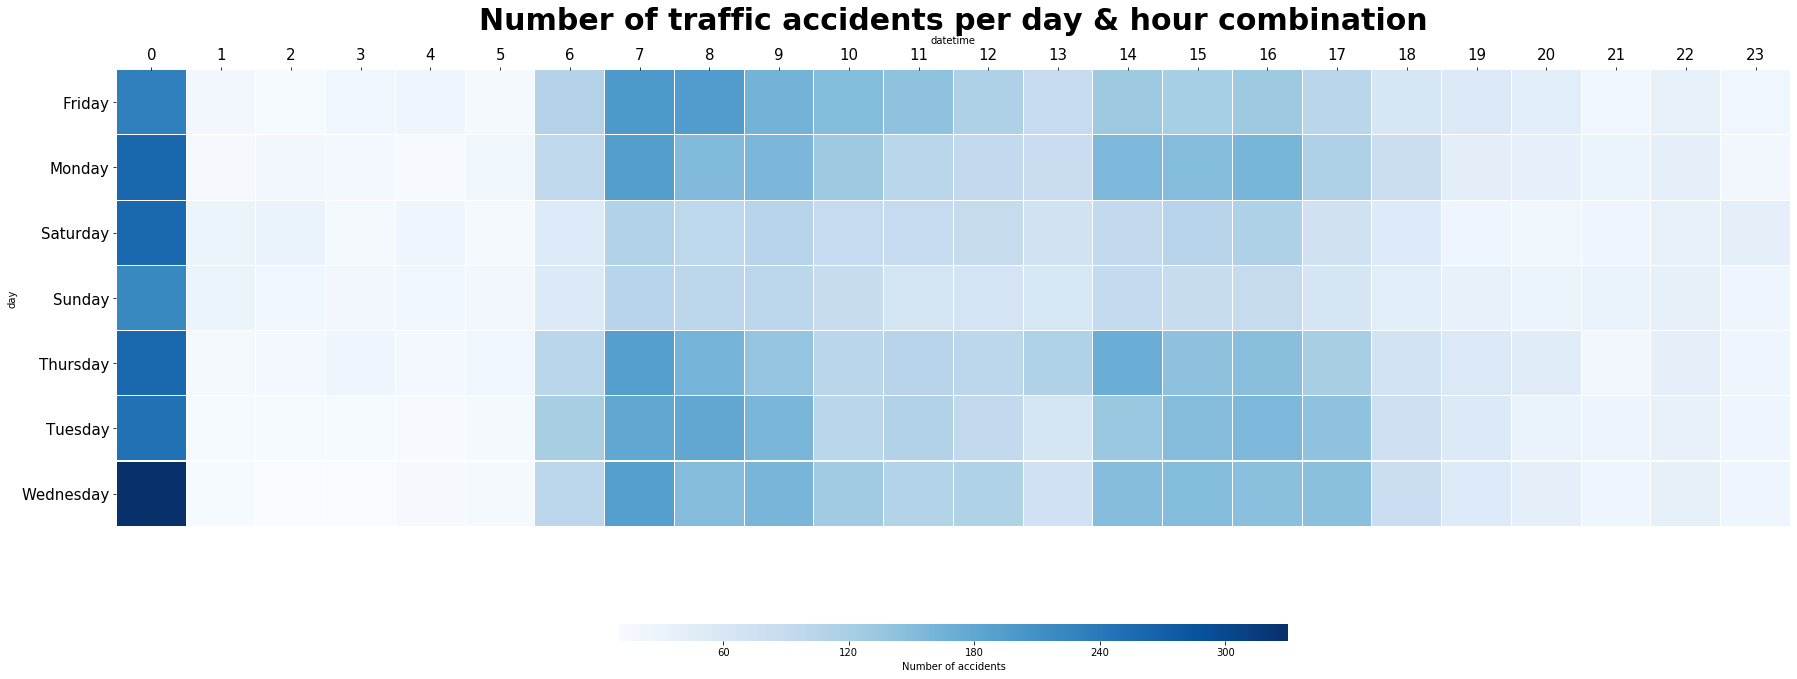

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(30,12))
result = dfmap.pivot(index='day', columns='datetime', values='count')
graph = sns.heatmap(result, cmap="Blues", linecolor="white", linewidths=0.1,cbar_kws={"orientation": "horizontal", "shrink":0.40, "aspect":40, "label": "Number of accidents"})


ax.set_title("Number of traffic accidents per day & hour combination", 
fontsize=30, fontweight="bold")

from matplotlib import rcParams
rcParams['axes.titlepad'] = 70 # Space between the title and graph

locs, labels = plt.yticks() # Rotating row labels
plt.setp(labels, rotation=0) # Rotating row labels

ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

graph.tick_params(axis='both',labelsize=15) # Tick label size
graph

In [ ]:
test["datetime"] = pd.to_datetime(test['datetime'])
test['period'] = (test['datetime'].dt.hour % 24 + 4) // 4
test['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
test["period"] = test["period"].astype('category')
# longitude                      object
df = test[test.longitude != "Closed"] # there are 5 rows which have 'closed' as the value instead of longitude, in my opinion this is nowhere near enough data lost to warrant imputation or similar
test["longitude"] = test["longitude"].astype(float)
# latitude                      float64
    # fine
# road_segment_id                object
test["segment_id"] = test["segment_id"].astype('category')
test.head()

#### Step 2: Add weather predictors to data frame

In [60]:
weather = pd.read_csv("weather_new.csv", parse_dates = ['Local time in Cape Town / Molteno Reservoir'])
weather = weather.sort_values(by =['Local time in Cape Town / Molteno Reservoir'])
weather.rename(columns = {'Local time in Cape Town / Molteno Reservoir':'datetime'}, inplace = True)
weather.rename(columns = {'air temperature':'airtemp'}, inplace = True)
weather.rename(columns = {'stmospheric pressure':'atmospres'}, inplace = True)
weather.rename(columns = {'relative humidity':'relhumid'}, inplace = True)
weather.rename(columns = {'wind direction':'windirect'}, inplace = True)
weather.rename(columns = {'maximum gust value':'maxgust'}, inplace = True)
weather.rename(columns = {'maximum air temperature':'maxair'}, inplace = True)
weather.rename(columns = {'minimum air temperature':'minair'}, inplace = True)
weather = weather.drop(["atmospres", 'Pa', 'Td', "airtemp", "relhumid", "maxair", "minair"], axis = 1)
weather.head()

,datetime,windirect,maxgust
11084,2016-01-08 02:00:00,Wind blowing from the north-west,6.0
11083,2016-01-08 05:00:00,Wind blowing from the east,3.0
11082,2016-01-08 11:00:00,Wind blowing from the south,2.0
11081,2016-01-08 14:00:00,Wind blowing from the north-northwest,4.0
11080,2016-01-08 17:00:00,"Calm, no wind",1.0


In [61]:
# change wind to boolean
a = weather.windirect.value_counts()
print (a)

Calm, no wind                            1534
Wind blowing from the west-southwest     1212
Wind blowing from the west               1149
Wind blowing from the south-east         1025
Wind blowing from the south-southeast     921
Wind blowing from the south               673
Wind blowing from the west-northwest      663
Wind blowing from the north-northeast     572
Wind blowing from the south-west          515
Wind blowing from the north-west          477
Wind blowing from the east-southeast      454
Wind blowing from the north               422
Wind blowing from the north-east          380
Wind blowing from the south-southwest     357
Wind blowing from the east                337
Wind blowing from the north-northwest     293
Wind blowing from the east-northeast      244
Name: windirect, dtype: int64


In [62]:
#get first value of index
vals = a[:1].index
print (vals)

Index(['Calm, no wind'], dtype='object')


In [63]:
weather['windirectnew'] = np.where(weather.windirect.isin(vals), 0,1)
weather = weather.drop(["windirect"], axis = 1)
print (weather)

                 datetime  maxgust  windirectnew
11084 2016-01-08 02:00:00      6.0             1
11083 2016-01-08 05:00:00      3.0             1
11082 2016-01-08 11:00:00      2.0             1
11081 2016-01-08 14:00:00      4.0             1
11080 2016-01-08 17:00:00      1.0             0
...                   ...      ...           ...
80    2020-12-07 11:00:00      4.0             1
79    2020-12-07 14:00:00      6.0             1
78    2020-12-07 17:00:00     11.0             1
77    2020-12-07 20:00:00      8.0             1
76    2020-12-07 23:00:00     11.0             1

[11228 rows x 3 columns]


In [64]:
# combine the weather and test and train data frames
weather = weather.fillna(1.0)
weather["datetime"] = pd.to_datetime(weather['datetime'])
train.sort_values('datetime', inplace=True)
test.sort_values('datetime', inplace=True)
weather.sort_values('datetime', inplace=True)

# create weather train and weather test splits
# Train on 2017
weathertrain = weather.loc[weather['datetime'] < '2018-01-01']
weathertrain = weathertrain.loc[weather['datetime'] >= '2017-01-01']
weathertest = weather.loc[weather['datetime'] < '2019-01-01']
weathertest = weathertest.loc[weather['datetime'] >= '2018-09-01']
weathertest.tail()

,datetime,maxgust,windirectnew
4369,2018-12-31 11:00:00,6.0,1
4368,2018-12-31 14:00:00,5.0,1
4367,2018-12-31 17:00:00,7.0,1
4366,2018-12-31 20:00:00,5.0,1
4365,2018-12-31 23:00:00,1.0,0


In [65]:
# impute average gust value via resampling (easiest way to add weather data, more complex ways could capture nuance of data better)
# impute average wind gust for day over data 
weathertrain = weathertrain.resample("1D", on = "datetime").mean()
weathertest = weathertest.resample("1D", on = "datetime").mean()

In [66]:
weathertrain = weathertrain.resample('H').pad()
weathertest = weathertest.resample('H').pad()

In [67]:
train1 = pd.merge_asof(weathertrain, train, on="datetime") 
#windirect new = percentage of time during day that there was wind
test1 = pd.merge_asof(weathertest, test, on="datetime")

In [68]:
train1.head()

,datetime,maxgust,windirectnew,datetime x segment_id,segment_id,y,day,min,longitude,latitude,period
0,2017-01-01 00:00:00,3.75,0.75,2017-01-01 00:00:00 x IQEYE3S,IQEYE3S,0,Sunday,0,18.677575,-33.897557,Late Night
1,2017-01-01 01:00:00,3.75,0.75,2017-01-01 01:00:00 x PRRLPFL,PRRLPFL,0,Sunday,60,18.446153,-33.933016,Late Night
2,2017-01-01 02:00:00,3.75,0.75,2017-01-01 02:00:00 x J8FAZRB,J8FAZRB,0,Sunday,120,18.947550,-33.782653,Late Night
3,2017-01-01 03:00:00,3.75,0.75,2017-01-01 03:00:00 x 8YJIRQ2,8YJIRQ2,0,Sunday,180,18.803257,-33.816684,Late Night
4,2017-01-01 04:00:00,3.75,0.75,2017-01-01 04:00:00 x C0RCCDP,C0RCCDP,0,Sunday,240,18.856803,-33.801712,Early Morning


In [69]:
test1.head()

,datetime,maxgust,windirectnew,datetime x segment_id,segment_id,y,day,min,longitude,latitude
0,2018-09-01 00:00:00,9.625,1.0,2018-09-01 00:00:00 x PV3AVCT,PV3AVCT,0,Wednesday,900,18.937523,-33.785420
1,2018-09-01 01:00:00,9.625,1.0,2018-09-01 01:00:00 x GLFV0XV,GLFV0XV,0,Monday,300,18.976542,-33.761882
2,2018-09-01 02:00:00,9.625,1.0,2018-09-01 02:00:00 x NCMIGB7,NCMIGB7,0,Saturday,840,18.614003,-34.016828
3,2018-09-01 03:00:00,9.625,1.0,2018-09-01 03:00:00 x DZABHQW,DZABHQW,0,Friday,1320,18.635994,-34.002236
4,2018-09-01 04:00:00,9.625,1.0,2018-09-01 04:00:00 x X9J910I,X9J910I,0,Monday,1080,18.929649,-34.144853


In [106]:
i = test1['day'].dt.dayofweek.values.argsort()
test1 = test1.iloc[i]

AttributeError: Can only use .dt accessor with datetimelike values

Modelling. Approach 1.

Use the model from the StarterNotebook - CatBoost

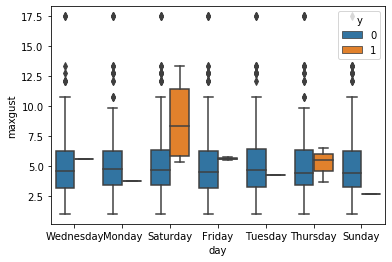

In [104]:
dfwz = test1.loc[test1['y'] == 1]

sns.boxplot(x="day", y="maxgust", hue="y", data=test1)


In [ ]:
train1.dtypes

In [ ]:
train1[x_cols]

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(iterations=100, 
                           loss_function='Logloss',
                           random_seed = 42,
                           verbose=False) 

x_cols = ['maxgust', 'windirectnew', 'segment_id', 'day', 'min', 'longitude', 'latitude', 'period']
cat_cols = ['segment_id', 'day', 'period']

In [ ]:
(train1[x_cols])[:, 1]

In [ ]:
model.fit(train1[x_cols], train1['y'], cat_features=cat_cols)

In [ ]:
from sklearn.metrics import log_loss
log_loss(train1['y'], model.predict_proba(train1[x_cols])[:, 1])

In [ ]:
log_loss?

In [ ]:
# What about just predicting 0s?
log_loss(train1['y'], [0 for y in train1['y']])

In [ ]:
log_loss(test1['y'], model.predict_proba(test1[x_cols])[:, 1])

# not too bad - only slightly worse than for train

F1 metric

In [ ]:
# First, just using .predict
from sklearn.metrics import f1_score
f1_score(test1['y'], model.predict(test1[x_cols]))

In [ ]:
# Let's predict 1 even if the prob is just > 0.005
test1['pred'] = model.predict_proba(test1[x_cols])[:,1]
test1['gt005'] = (test1['pred']>0.005).astype(int)
test1.head()

In [ ]:
f1_score(test1['y'], test1['gt005'])

# Interesting... the value seems to be extremely low, which is not great. We want f1 score to be as close to 1 as possible.

In [ ]:
import numpy as np
import lightgbm as lgb

In [ ]:
model_lgb = lgb.LGBMClassifier(learning_rate = 0.003,
                               boosting_type = 'gbdt',
                               objective = 'binary',
                               metric = 'binary_logloss',
                               sub_feature = 0.5,
                               num_leaves = 15,
                               min_data = 50,
                               max_depth = -1)

x_cols = ['maxgust', 'windirectnew', 'segment_id', 'min', 'longitude', 'latitude', 'period']
cat_cols = ['segment_id', 'day', 'period']

In [ ]:
model_lgb.fit(train1[x_cols], train1['y'])

In [ ]:
#that does not look right

In [ ]:
y_pred=model_lgb.predict(test1[x_cols])

for i in range(0,1):
    if y_pred[i]>=.005:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test1['y'], y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, test1['y'])

In [ ]:
cm

In [ ]:
accuracy

#are you sure about that

### Hyperparameter Tuning 

In [ ]:
from itertools import product,chain
from sklearn.model_selection import KFold

In [ ]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000,23],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3, 0.0005], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':4}

In [ ]:
def crossvaltest(params,train_set,train_label,cat_dims,n_splits=3):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_set):
        train = train_set.iloc[train_index,:]
        test = train_set.iloc[test_index,:]

        labels = train_label.ix[train_index]
        test_labels = train_label.ix[test_index]

        clf = CatBoostClassifier(**params)
        clf.fit(train, np.ravel(labels), cat_features=cat_dims)

        res.append(np.mean(clf.predict(test)==np.ravel(test_labels)))
    return np.mean(res)

In [ ]:
import param
from itertools import chain

# this function runs grid search on several parameters
def catboost_param_tune(params,train_set,train_label,cat_dims=None,n_splits=3):
    ps = paramsearch(params)
    # search 'border_count', 'l2_leaf_reg' etc. individually 
    #   but 'iterations','learning_rate' together
    for prms in chain(ps.grid_search(['border_count']),
                      ps.grid_search(['ctr_border_count']),
                      ps.grid_search(['l2_leaf_reg']),
                      ps.grid_search(['iterations','learning_rate']),
                      ps.grid_search(['depth'])):
        res = crossvaltest(prms,train_set,train_label,cat_dims,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        ps.register_result(res,prms)
        #print(res,prms,s'best:',ps.bestscore(),ps.bestparam())
    return ps.bestparam()


bestparams = catboost_param_tune(params,train_label,x_cols,cat_cols)